## Importing libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading and checking the data set

In [28]:
# Loading the dataset to a Pandas DataFrame
credits_card_data = pd.read_csv("creditcard.csv")

# Print First 5 rows of our DataFrame
credits_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA (Exploratory Data Analysis)

### Data exploration

In [29]:
credits_card_data.shape

(284807, 31)

In [30]:
credits_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
credits_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

1. Missing values

In [32]:
credits_card_data.isnull().sum()

Time 0
V1 0
V2 0
V3 0
V4 0
V5 0
V6 0
V7 0
V8 0
V9 0
V10 0
V11 0
V12 0
V13 0
V14 0
V15 0
V16 0
V17 0
V18 0
V19 0
V20 0
V21 0
V22 0
V23 0
V24 0
V25 0
V26 0
V27 0
V28 0
Amount 0
Class 0
dtype: int64

2.Categorical variable

0    284315
1       492
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

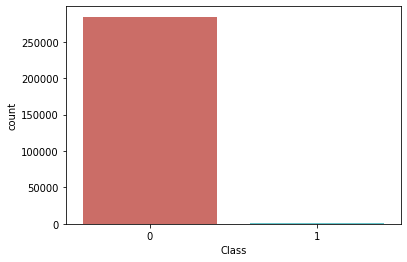

In [33]:
count_class = credits_card_data["Class"].value_counts(dropna=False)
print(count_class)
sns.countplot(x="Class", data=credits_card_data, palette="hls", hue="Class", legend=False )

This Dataset is highly imbalanced

3. Numerical variable

0 -> Normal Transection

1 -> Fraudulent Transection

In [34]:
# separating data for analysis
legit = credits_card_data[credits_card_data["Class"] == 0]
fraud = credits_card_data[credits_card_data["Class"] == 1]

In [35]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [36]:
legit.Amount.describe()

count 284315.000000
mean 88.291022
std 250.105092
min 0.000000
25% 5.650000
50% 22.000000
75% 77.050000
max 25691.160000
Name: Amount, dtype: float64

In [37]:
fraud.Amount.describe()

count 492.000000
mean 122.211321
std 256.683288
min 0.000000
25% 1.000000
50% 9.250000
75% 105.890000
max 2125.870000
Name: Amount, dtype: float64

In [38]:
# compare the values for both transactions
credits_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Data preprocessing

Build a sample dataset containing similar distribution of Normal Transactions and Fraudulent Transactions

Number of Fraudulent Transactions -> 492

In [39]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [40]:
sample_df = pd.concat([legit_sample,fraud], axis=0)

In [41]:
sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109996,71632.0,-0.814740,0.876843,0.695514,-1.142758,-0.068441,-0.250029,0.091057,0.680802,-0.326577,...,0.231412,0.594398,-0.091223,-0.259163,-0.524970,0.932075,0.181148,0.126247,2.92,0
40380,40214.0,0.946700,-1.033902,0.375471,0.496829,-0.770650,0.624706,-0.527027,0.059080,-0.531855,...,-0.146400,-0.129070,-0.303127,-0.755655,0.521510,-0.163292,0.062966,0.056905,198.00,0
62642,50353.0,-0.221735,-0.766816,2.259537,-1.680219,-1.915137,-0.113896,-0.632622,0.081851,-1.648334,...,-0.121190,0.057461,0.102844,0.355996,-0.185425,-0.238002,0.104556,0.077106,85.65,0
265272,161812.0,1.965847,-0.330738,-0.233208,0.498125,-0.646443,-0.464018,-0.519823,-0.110768,1.271905,...,0.212353,0.936407,0.098674,-0.022016,-0.059078,-0.210480,0.052929,-0.034146,12.99,0
63555,50771.0,0.826778,-0.961233,0.949810,0.147371,-0.945919,0.915418,-0.773996,0.476525,1.004354,...,-0.052679,-0.182368,0.019008,-0.208181,-0.107892,0.971789,-0.032746,0.019181,140.00,0


In [42]:
sample_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [43]:
sample_df['Class'].value_counts()

0 492
1 492
Name: Class, dtype: int64

In [44]:
sample_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91061.662602,-0.061105,-0.023044,0.153638,-0.042023,-0.063402,0.081043,-0.033000,0.049380,0.078983,...,0.012955,-0.018518,0.014959,0.026925,0.042344,-0.023731,0.038410,0.005322,0.008691,83.318435
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [45]:
X = sample_df.drop(columns=['Class'], axis=1)
y = sample_df['Class']

In [46]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
109996   71632.0 -0.814740  0.876843  0.695514 -1.142758 -0.068441 -0.250029   
40380    40214.0  0.946700 -1.033902  0.375471  0.496829 -0.770650  0.624706   
62642    50353.0 -0.221735 -0.766816  2.259537 -1.680219 -1.915137 -0.113896   
265272  161812.0  1.965847 -0.330738 -0.233208  0.498125 -0.646443 -0.464018   
63555    50771.0  0.826778 -0.961233  0.949810  0.147371 -0.945919  0.915418   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [47]:
print(y)

109996    0
40380     0
62642     0
265272    0
63555     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Train Model

In [48]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [49]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [50]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression()

In [51]:
model.score(X_train,y_train)

0.9351969504447268

In [52]:
# accuracy on test data
test_data_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(test_data_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.949238578680203
